In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### check missing values

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

we dont have any missing values in our data

#### check datatype

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### check corelation between features

In [7]:
df_corr = df.corr()
df_corr['output']

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

#### will sort values in descending order

In [8]:
df_corr["output"].sort_values(ascending = False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

by corelation we have seen feature cp, thalachh,slp and restecg is highly corelated with output

#### lets plot graph between output and high correlared features

In [15]:
df_corr_output=df_corr['output'].sort_values(ascending=False)

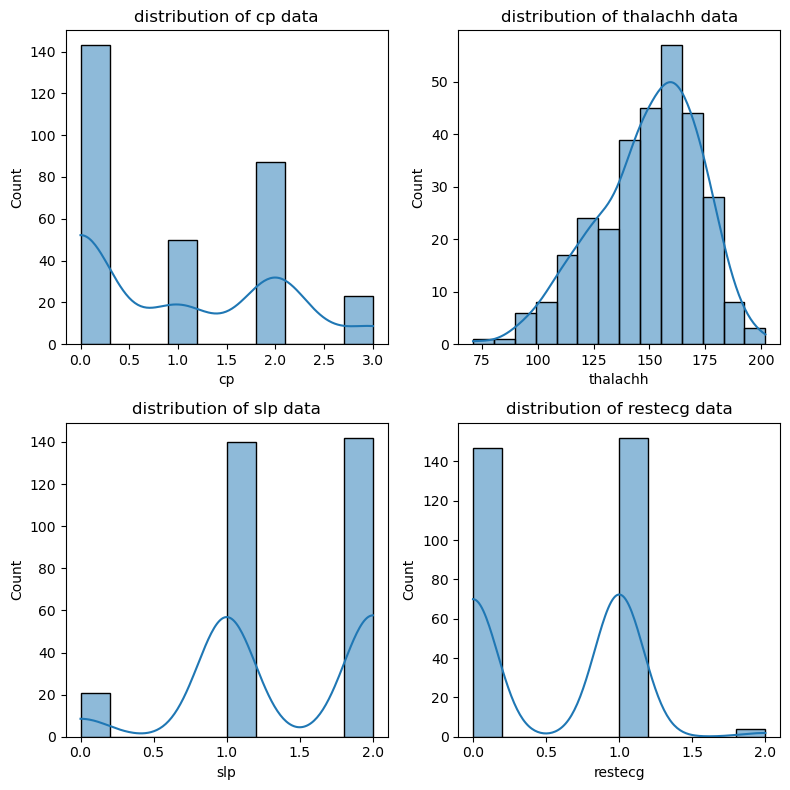

In [16]:
plt.figure(figsize = (8, 8))

for i,column in enumerate(df_corr_output.index[1:5],1):
    plt.subplot(2,2,i)
    sns.histplot(df[column],kde=True)
    plt.title(f"distribution of {column} data")
    plt.tight_layout()
    plt.plot()

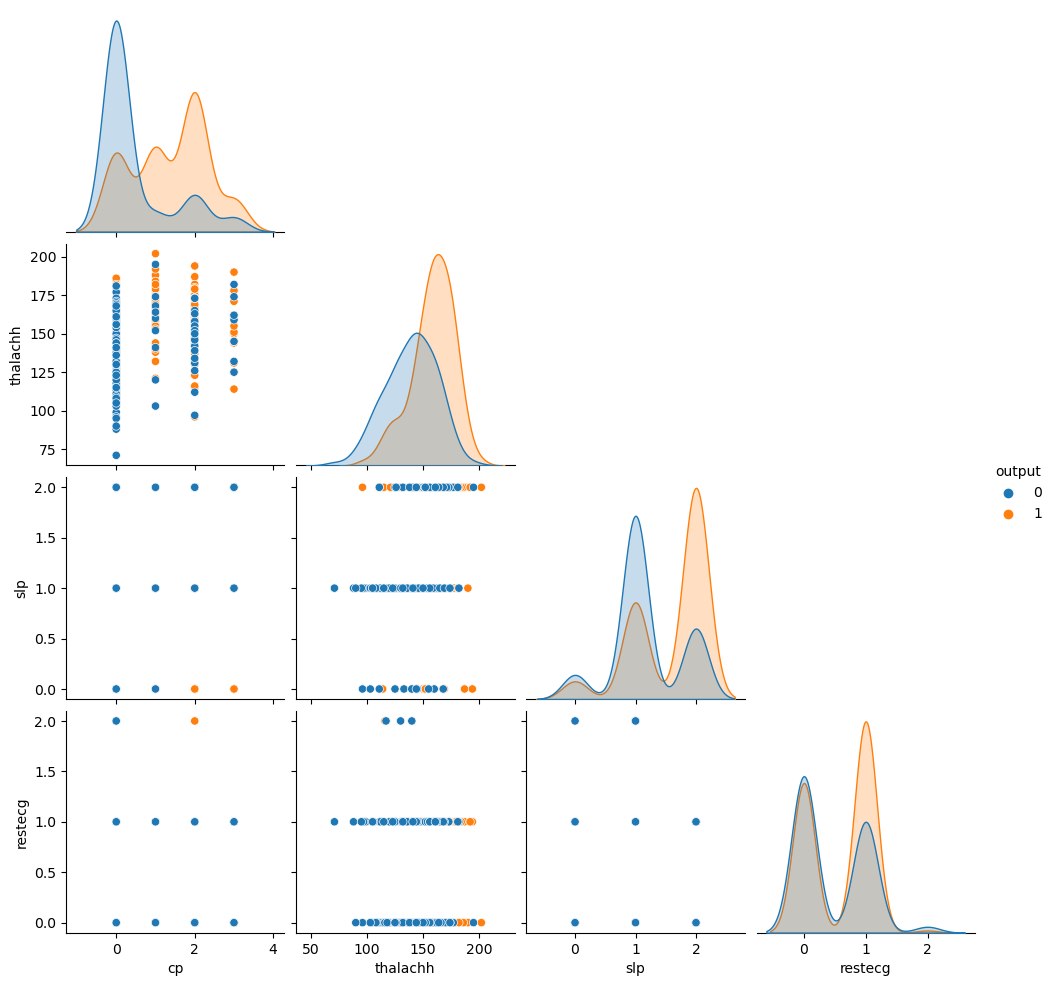

In [18]:
sns.pairplot(df[["cp", "thalachh", "slp", "restecg", "output"]], hue = "output", corner = True)

By upper graphs, we can see THREE things.
1) Lower CP, Lower Heart Attack happens.
2) Higher THALACHH & SLP, Higher Heart Attck happens.
3) RESTECG is not correlated with OUTPUT specially.

#### preprocessing- standardscalar

In [ ]:
continuous_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
target = 'output'

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [24]:
category_cols = ["age", "trtbps", "chol", "thalachh"]
df[category_cols]=sc.fit_transform(df[category_cols])

In [25]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


#### Preprocessing - Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=df.iloc[:,:-1]

In [28]:
y=df.iloc[:,-1]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=0)

## LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model1=LogisticRegression()

In [34]:
model1

LogisticRegression()

In [37]:
model1.fit(X_train,y_train)

LogisticRegression()

In [39]:
model1.score(X_train,y_train)*100

83.88429752066115

In [41]:
model1.score(X_test,y_test)*100

85.24590163934425

## Support vector classifier

In [42]:
from sklearn.svm import SVC

In [62]:
model2s=SVC()

In [63]:
model2s.fit(X_train,y_train)

SVC()

In [64]:
model2s.score(X_train,y_train)*100

88.42975206611571

In [65]:
model2s.score(X_test,y_test)*100

83.60655737704919

## DecisionTree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model3=DecisionTreeClassifier()

In [55]:
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
model3.score(X_train,y_train)*100

100.0

In [59]:
model3.score(X_test,y_test)*100

75.40983606557377

## RandomForest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model4=RandomForestClassifier()

In [69]:
model4.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
model4.score(X_train,y_train)*100

100.0

In [72]:
model4.score(X_test,y_test)*100

85.24590163934425

## KNeighbors Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
model5=KNeighborsClassifier()

In [76]:
model5.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
model5.score(X_train,y_train)*100

85.53719008264463

In [79]:
model5.score(X_test,y_test)*100

83.60655737704919

As we have seen in above models DecisionTree Classifier and randomforest give us 100% accuracy in training data but in testing data randomforest algorithm give us 85 over 75 in decision tree

#### here we choose randomforest algorithm which give 100%  accuracy in training data and 85% accuracy in testing data